# PA 3-1: Association Analysis - Apriori/FP Growth

## Student Details 

Student Name and ID: Group members name and ID :-

Krishna Kumar Balasubramanian 1001949939
Pooja Srinivasan 1001952061
Mohanraj Senabady 1001964323 



## Submission Instructions

Rename this submission file as specified in the instructions document

## Tasks

1.    Load the dataset (from the csv file)

In [2]:
import pandas as pd #pandas is a Python library used for working with data sets
import numpy as np #perform a wide variety of mathematical operations on arrays
import matplotlib.pyplot as plt #used for visualizations in Python
import seaborn as sns #seaborn is built on matplotlib
import ast #helps Python applications to process trees of the Python abstract syntax grammar
import time #returns the number of seconds passed since epoch

In [3]:
from matplotlib.pyplot import scatter #visual representation of how two variables relate to each other
from tqdm import tqdm #used to create a smart progress bar for the loops.
from mlxtend.preprocessing import TransactionEncoder #encodes database transaction data in form of a Python list of lists into a NumPy array.
from mlxtend.frequent_patterns import apriori #extracting frequent itemsets with applications in association rule learning.
from mlxtend.frequent_patterns import fpgrowth #the mining of pattern itemsets, subsequences, and substructures that appear frequently in a dataset
from mlxtend.frequent_patterns import association_rules #"if-then" statements, that help to show the probability of relationships between data items, within large data sets in various types of databases

In [4]:
data = pd.read_csv("dataset1.csv")
data.head(5)

,Tid,items
0,0,"Bread, Corn, Dill, Ice cream, Sugar, Yogurt, c..."
1,1,"Milk,"
2,2,"Apple, Butter, Dill, Ice cream, Milk, Yogurt, ..."
3,3,"Butter, Cheese, Dill, Milk, Nutmeg, Onion,"
4,4,"Apple, Bread,"


2.Pre-process the dataset and provide a detailed explanation (such as Handling of null values, empty strings, unncessary trailing characters such as commas and white spaces)

In [5]:
print("Null values:", data.isnull().sum())
emt = (data['items'].str.strip().str.len() == 0).sum() #removes any leading or trailing whitespace from each item in the column
print("\nNo. of rows that have empty strings:", emt)

Null values: Tid      0
items    0
dtype: int64

No. of rows that have empty strings: 0


#### Converting items in the column as strings

In [6]:
data['items'] = data['items'].astype(str)

#### Removing unnecessary commas and whitespace from the items column

In [7]:
data['items'] = data['items'].str.strip().str.rstrip(',')

#### Spliting the items column into a items list

In [8]:
data['items'] = data['items'].str.split(',')

#### Converting items column to a list of lists

In [9]:
trans = data['items'].tolist()

#### Convert each item string in the items column to a list of items

In [10]:
data['items'] = data['items'].apply(lambda x: eval(x) if isinstance(x, str) else x)
data.head(5)

,Tid,items
0,0,"[Bread, Corn, Dill, Ice cream, Sugar, Yog..."
1,1,[Milk]
2,2,"[Apple, Butter, Dill, Ice cream, Milk, Yo..."
3,3,"[Butter, Cheese, Dill, Milk, Nutmeg, Onion]"
4,4,"[Apple, Bread]"


3.    Encode the dataset

#### Using transaction encoder fitting and transforming the data

In [11]:
traen = TransactionEncoder()
traen_array = traen.fit(data['items']).transform(data['items'])

In [12]:
data_en = pd.DataFrame(traen_array, columns=traen.columns_) #fitting traen to the transactions data using the fit_transform method, which returns a NumPy array

In [13]:
print(data_en.dtypes ,data_en.shape)

 Bread           bool
 Butter          bool
 Cheese          bool
 Corn            bool
 Dill            bool
 Eggs            bool
 Ice cream       bool
 Kidney Beans    bool
 Milk            bool
 Nutmeg          bool
 Onion           bool
 Sugar           bool
 Unicorn         bool
 Yogurt          bool
 chocolate       bool
Apple            bool
Bread            bool
Butter           bool
Cheese           bool
Corn             bool
Dill             bool
Eggs             bool
Ice cream        bool
Kidney Beans     bool
Milk             bool
Nutmeg           bool
Onion            bool
Sugar            bool
Unicorn          bool
Yogurt           bool
dtype: object (999, 30)


For each of the combinations in tasks 4 & 5, print the output in the following Sample format: 

- Support = 0.02
- Confidence = 0.1
- Total Number of Association Rules: 10
- Top 5 rules ordered by Confidence descending:
- Number of Maximal Sets: 5
- Number of Closed Sets: 5

4.	Execute Apriori algorithm and generate rules for 3 different combinations of support and confidence

In [14]:
#3 different combinations of support and confidence
sl = [0.01, 0.02, 0.03]
cl = [0.1, 0.2, 0.3]

#checking whether the transctions are not empty
if not trans:
    raise ValueError("Input transactions are empty.")

#for loop used to traverse between support and confidence
for support in sl:
    for confidence in cl:

        #apriori algorithm
        traen = TransactionEncoder() #the transactionEncoder class is used to convert a list of transactions into a one-hot encoded NumPy array or pandas DataFrame
        traen_array = traen.fit(trans).transform(trans)
        data1 = pd.DataFrame(traen_array, columns=traen.columns_)
        freq_item = apriori(data1, min_support=support, use_colnames=True)
        print('freq_item',freq_item)

        asso_rule = association_rules(freq_item, metric="confidence", min_threshold=confidence) #generating association rules

        if asso_rule.empty:
            print(f"No association rules found for Support={support} and Confidence={confidence}")  #checking whether the transctions are not empty
            continue
        
        #by applying frozenset to each item in the 'antecedents' column, we are essentially converting each set of antecedents into an immutable frozenset.
        asso_rule['antecedents'] = asso_rule['antecedents'].apply(frozenset)
        asso_rule['consequents'] = asso_rule['consequents'].apply(frozenset)

        #maximal and closed sets
        maxed_set = freq_item[~freq_item['itemsets'].apply(lambda x: any(frozenset(x).issubset(s) and frozenset(x) != s for s in freq_item['itemsets']))]['itemsets'].apply(frozenset).tolist()
        closed_set = freq_item[~freq_item['support'].duplicated(keep='last')]['itemsets'].apply(frozenset).tolist()
                
        print(f"Support = {support:.2f}","/", f"Confidence = {confidence:.2f}","/", f"Total No.association rules: {len(asso_rule)}","/", f"No. of Maximal Sets: {len(maxed_set)}","/", f"No. of Closed Sets: {len(closed_set)}\n")
        print("Top 10 rules ordered by confidence descending:")
        print(asso_rule.nlargest(10, 'confidence').to_string(index=False))
        print("\n")

freq_item         support                                           itemsets
0      0.154154                                           ( Bread)
1      0.288288                                          ( Butter)
2      0.321321                                          ( Cheese)
3      0.361361                                            ( Corn)
4      0.366366                                            ( Dill)
...         ...                                                ...
11441  0.010010  ( Milk,  chocolate,  Onion,  Eggs,  Ice cream,...
11442  0.011011  ( Milk,  Onion,  Eggs,  Ice cream,  Unicorn, A...
11443  0.010010  ( Milk,  Onion,  Eggs,  Kidney Beans,  Unicorn...
11444  0.010010  ( chocolate,  Nutmeg,  Onion,  Kidney Beans,  ...
11445  0.010010  ( chocolate,  Sugar,  Onion,  Kidney Beans,  U...

[11446 rows x 2 columns]
Support = 0.01 / Confidence = 0.10 / Total No.association rules: 289856 / No. of Maximal Sets: 3748 / No. of Closed Sets: 167

Top 10 rules ordered by confidenc

Support = 0.02 / Confidence = 0.10 / Total No.association rules: 74084 / No. of Maximal Sets: 2245 / No. of Closed Sets: 157

Top 10 rules ordered by confidence descending:
            antecedents consequents  antecedent support  consequent support  support  confidence     lift  leverage  conviction  zhangs_metric
               ( Bread)     (Apple)            0.154154            0.383383 0.154154         1.0 2.608355  0.095054         inf       0.728994
      ( Bread,  Butter)     (Apple)            0.080080            0.383383 0.080080         1.0 2.608355  0.049379         inf       0.670294
      ( Bread,  Cheese)     (Apple)            0.066066            0.383383 0.066066         1.0 2.608355  0.040737         inf       0.660236
        ( Bread,  Corn)     (Apple)            0.080080            0.383383 0.080080         1.0 2.608355  0.049379         inf       0.670294
        ( Dill,  Bread)     (Apple)            0.070070            0.383383 0.070070         1.0 2.608355  0.043

Support = 0.03 / Confidence = 0.20 / Total No.association rules: 17091 / No. of Maximal Sets: 1355 / No. of Closed Sets: 147

Top 10 rules ordered by confidence descending:
            antecedents consequents  antecedent support  consequent support  support  confidence     lift  leverage  conviction  zhangs_metric
               ( Bread)     (Apple)            0.154154            0.383383 0.154154         1.0 2.608355  0.095054         inf       0.728994
      ( Bread,  Butter)     (Apple)            0.080080            0.383383 0.080080         1.0 2.608355  0.049379         inf       0.670294
      ( Bread,  Cheese)     (Apple)            0.066066            0.383383 0.066066         1.0 2.608355  0.040737         inf       0.660236
        ( Bread,  Corn)     (Apple)            0.080080            0.383383 0.080080         1.0 2.608355  0.049379         inf       0.670294
        ( Dill,  Bread)     (Apple)            0.070070            0.383383 0.070070         1.0 2.608355  0.043

5.    Execute FP Growth algorithm and generate rules for 3 different combinations of support and confidence

In [15]:
#3 different combinations of support and confidence
sl = [0.04, 0.05, 0.06]
cl = [0.2, 0.3, 0.4]

#for loop used to traverse between support and confidence
for support in sl:
    for confidence in cl:

        freq_item = fpgrowth(data_en, min_support=support, use_colnames=True) #fp Growth algorithm

        asso_rule = association_rules(freq_item, metric="confidence", min_threshold=confidence) #generating association rules using the frequent itemsets

        #checking whether association rules are not empty
        if asso_rule.empty:
            print(f"No association rules found for Support={support} and Confidence={confidence}")
            continue

        #by applying frozenset to each item in the 'antecedents' column, we are essentially converting each set of antecedents into an immutable frozenset.s
        asso_rule['antecedents'] = asso_rule['antecedents'].apply(frozenset)
        asso_rule['consequents'] = asso_rule['consequents'].apply(frozenset)
                
        print(f"Support = {support:.2f}","/", f"Confidence = {confidence:.2f}","/", f"Total No.association rules: {len(asso_rule)}","/", f"No. of Maximal Sets: {len(maxed_set)}","/", f"No. of Closed Sets: {len(closed_set)}\n")
        print("Top 10 rules ordered by confidence descending:")
        print(asso_rule.nlargest(10, 'confidence').to_string(index=False))
        print("\n")

Support = 0.04 / Confidence = 0.20 / Total No.association rules: 11246 / No. of Maximal Sets: 1355 / No. of Closed Sets: 147

Top 10 rules ordered by confidence descending:
                  antecedents consequents  antecedent support  consequent support  support  confidence     lift  leverage  conviction  zhangs_metric
                     ( Bread)     (Apple)            0.154154            0.383383 0.154154         1.0 2.608355  0.095054         inf       0.728994
            ( Bread,  Yogurt)     (Apple)            0.085085            0.383383 0.085085         1.0 2.608355  0.052465         inf       0.673961
            ( Bread,  Butter)     (Apple)            0.080080            0.383383 0.080080         1.0 2.608355  0.049379         inf       0.670294
   ( Butter,  Bread,  Yogurt)     (Apple)            0.044044            0.383383 0.044044         1.0 2.608355  0.027158         inf       0.645026
    ( Bread,  Sugar,  Butter)     (Apple)            0.043043            0.383383 

Support = 0.06 / Confidence = 0.20 / Total No.association rules: 2663 / No. of Maximal Sets: 1355 / No. of Closed Sets: 147

Top 10 rules ordered by confidence descending:
         antecedents consequents  antecedent support  consequent support  support  confidence     lift  leverage  conviction  zhangs_metric
            ( Bread)     (Apple)            0.154154            0.383383 0.154154         1.0 2.608355  0.095054         inf       0.728994
   ( Bread,  Yogurt)     (Apple)            0.085085            0.383383 0.085085         1.0 2.608355  0.052465         inf       0.673961
   ( Bread,  Butter)     (Apple)            0.080080            0.383383 0.080080         1.0 2.608355  0.049379         inf       0.670294
( Bread,  chocolate)     (Apple)            0.079079            0.383383 0.079079         1.0 2.608355  0.048761         inf       0.669565
   ( Bread,  Nutmeg)     (Apple)            0.077077            0.383383 0.077077         1.0 2.608355  0.047527         inf    

6.	Plot the following graphs comparing both the algorithms:
    - time vs minimum support
    - time vs number of itemsets

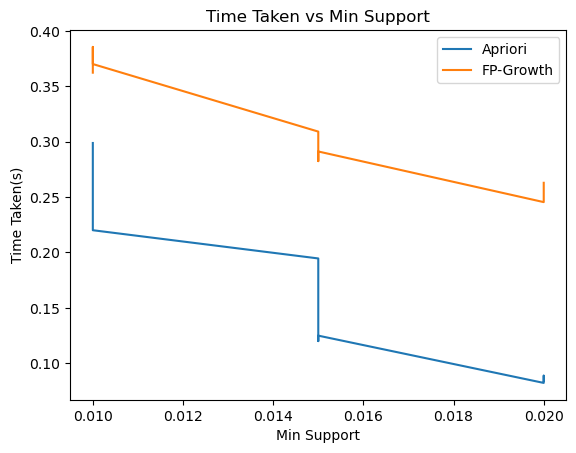

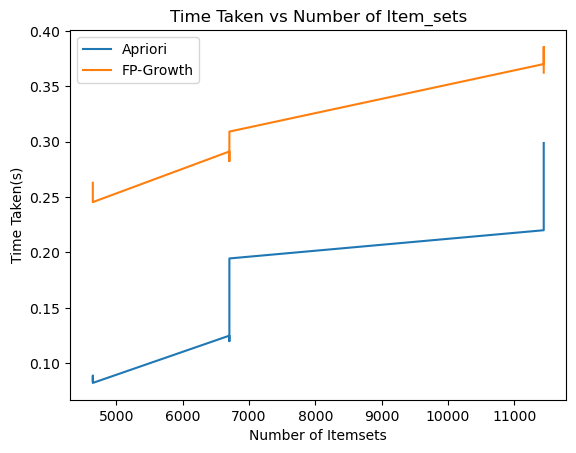

In [15]:
#3 different combinations of support and confidence
sl = [0.01, 0.015, 0.02]
cl = [0.2, 0.15, 0.1]

#checking whether the transctions are not empty
if not trans:
    raise ValueError("Input transactions are empty.")

#the lists below are is initialized as empty
ap_time = []
fp_time = []
min_support = []
itemsets_ap = []
itemsets_fp = []

#for loop used to traverse between support and confidence
for support in sl:
    for confidence in cl:

        #apriori algorithm
        start_time = time.time()
        traen = TransactionEncoder()
        traen_array = traen.fit(trans).transform(trans)
        data1 = pd.DataFrame(traen_array, columns=traen.columns_)
        freq_item = apriori(data1, min_support=support, use_colnames=True)
        end_time = time.time()

        #time taken and number of itemsets generated
        ap_time.append(end_time - start_time) #timedelta object representing the time difference between the two timestamps
        itemsets_ap.append(len(freq_item))
        min_support.append(support)

        #fp Growth algorithm
        start_time = time.time()
        freq_item = fpgrowth(data1, min_support=support, use_colnames=True)
        end_time = time.time()

        #time taken and number of itemsets generated
        fp_time.append(end_time - start_time)
        itemsets_fp.append(len(freq_item))


#graph 1: time vs min support
fig, ax = plt.subplots()
ax.plot(min_support, ap_time, label='Apriori')
ax.plot(min_support, fp_time, label='FP-Growth')
ax.set_xlabel('Min Support')
ax.set_ylabel('Time Taken(s)')
ax.set_title('Time Taken vs Min Support')
ax.legend()
plt.show()

#graph 2: time vs number of itemsets
fig, ax = plt.subplots()
ax.plot(itemsets_ap, ap_time, label='Apriori')
ax.plot(itemsets_fp, fp_time, label='FP-Growth')
ax.set_xlabel('Number of Itemsets')
ax.set_ylabel('Time Taken(s)')
ax.set_title('Time Taken vs Number of Item_sets')
ax.legend()
plt.show()

7.    Explain the insights that you got from the graphs. Which algorithm worked better and what do you believe is the reason?

The performance of the Apriori and FP-Growth frequent itemset mining techniques is demonstrated in the two graphs. The first graph shows that both algorithms require increasing processing time as the minimal support threshold increases. However, the Apriori method takes a lot longer than FP-Growth, especially at higher support levels. This is because the Apriori approach produces a large number of candidate itemsets with each iteration, which may be challenging to computationally assess. FP-Growth efficiently stores and mines frequent itemsets utilizing a prefix tree structure, which reduces the number of itemsets that must be generated and assessed.

The second graph shows that both approaches' processing times increase as the number of itemsets does. But once more, FP-Growth takes a lot less time than the Apriori algorithm. Because the Apriori approach generates a large number of candidate itemsets with each iteration, this is done in order to generate and analyze more itemsets. In contrast, FP-Growth generates fewer itemsets since it only uses the frequent pattern tree to create the necessary frequent itemsets. Overall, the graphs demonstrate that FP-Growth outperforms Apriori for frequent itemset mining, particularly for larger datasets with stronger support criteria.

# Rubric
* [02 points] - Student Details and complying with submission instructions 
* [03 points] - Task 1 
* [10 points] - Task 2
* [05 points] - Task 3
* [25 points] - Task 4
* [25 points] - Task 5
* [20 points] - task 6
* [10 points] - task 7

In [ ]:
#Reference
#https://www.kaggle.com/code/rockystats/apriori-algorithm-or-market-basket-analysis
#https://towardsdatascience.com/understand-and-build-fp-growth-algorithm-in-python-d8b989bab342